# Homework 2

Author: Dmitry Ignatov, lecturer.


Your report (as ipython-notebook preferebaly) should be prepared by June 17.

The letter with the report should be sent to these emails: dmitrii.ignatov@gmail.com, ivannnnz@gmail.com, and  to.dmitry.petrov@gmail.com. The topic of the letter must have the following format [CS-ML2016m-HW2]-LAST NAME-FIRST NAME.

Max mark is 10.

You can use the material below for all purposes except of commercial. All the code examples can be also found in Toby Segaran book 'Programming Collective Intelligence' (chaper 2):  http://shop.oreilly.com/product/9780596529321.do

The two required tasks are given at the end of the file.


## Dictionary with users' preferences

In [52]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}


In [2]:
critics['Toby']

{'Snakes on a Plane': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 1.0}

In [3]:
critics['Lisa Rose']['Lady in the Water']


2.5

In [1]:
#Claculate Euclidean distance
from math import sqrt
sqrt(pow(5-4,2)+pow(4-1,2))


3.1622776601683795

In [6]:
#Transform distance to similarity
1/(1+sqrt(pow(5-4,2)+pow(4-1,2)))


0.2402530733520421

In [1]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
# Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
# if they have no ratings in common, return 0
    if len(si)==0: return 0
# Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2)
    for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)


In [8]:
sim_distance(critics, 'Lisa Rose','Gene Seymour')

0.14814814814814814

In [2]:
# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
# Get the list of mutually rated items
    si={}
    for item in prefs[p1]: 
        if item in prefs[p2]: si[item]=1

    # if they have no ratings in common, return 0
    if len(si)==0: return 0

    # Sum calculations
    n=len(si)
  
    # Sums of all the preferences
    sum1=sum([prefs[p1][it] for it in si])
    sum2=sum([prefs[p2][it] for it in si])
  
    # Sums of the squares
    sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
    sum2Sq=sum([pow(prefs[p2][it],2) for it in si])	
  
    # Sum of the products
    pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])
  
    # Calculate r (Pearson score)
    num=pSum-(sum1*sum2/n)
    den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0

    r=num/den

    return r

In [10]:
sim_pearson(critics,'Lisa Rose','Gene Seymour')


0.39605901719066977

## Ranking of critics

In [3]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.
def topMatches(prefs,person,n,similarity):
    scores=[(similarity(prefs,person,other),other)
    for other in prefs if other!=person]
    # sort the marks in descending order
    scores.sort( )
    scores.reverse( )
    return scores[0:n]

In [60]:
topMatches(critics,'Toby',3,sim_pearson)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

## Movie recommendation

In [4]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings
def getRecommendations(prefs,person,n,similarity):
    totals={}
    simSums={}
    # compute other persons who are similar to the given person
    similar_persons = topMatches(prefs,person,n,similarity)
    similar_persons = {key:value for (value,key) in similar_persons}
    # loop over only similar persons
    for other in similar_persons:
    # don't compare me to myself
        if other==person: continue
        sim=similarity(prefs,person,other)
    # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
    # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
    # Similarity * Score
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
        # Sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
    # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items( )]
    # Return the sorted list
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [63]:
getRecommendations(critics,'Toby',3,sim_pearson)

[(3.4770561784908676, 'The Night Listener'),
 (2.741286897471996, 'Lady in the Water'),
 (2.6709027453598853, 'Just My Luck')]

In [64]:
getRecommendations(critics,'Toby',3,sim_distance)

[(3.770670826833074, 'The Night Listener'),
 (2.759259259259259, 'Lady in the Water'),
 (2.433333333333333, 'Just My Luck')]

## Similarity of items

How to change

{'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5}}

by

{'Lady in the Water':{'Lisa Rose':2.5,'Gene Seymour':3.0},
'Snakes on a Plane':{'Lisa Rose':3.5,'Gene Seymour':3.5}}?


In [5]:
def transformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
    # Flip item and person
            result[item][person]=prefs[person][item]
    return result

In [17]:
movies=transformPrefs(critics)

In [18]:
movies

{'Just My Luck': {'Claudia Puig': 3.0,
  'Gene Seymour': 1.5,
  'Lisa Rose': 3.0,
  'Mick LaSalle': 2.0},
 'Lady in the Water': {'Gene Seymour': 3.0,
  'Jack Matthews': 3.0,
  'Lisa Rose': 2.5,
  'Michael Phillips': 2.5,
  'Mick LaSalle': 3.0},
 'Snakes on a Plane': {'Claudia Puig': 3.5,
  'Gene Seymour': 3.5,
  'Jack Matthews': 4.0,
  'Lisa Rose': 3.5,
  'Michael Phillips': 3.0,
  'Mick LaSalle': 4.0,
  'Toby': 4.5},
 'Superman Returns': {'Claudia Puig': 4.0,
  'Gene Seymour': 5.0,
  'Jack Matthews': 5.0,
  'Lisa Rose': 3.5,
  'Michael Phillips': 3.5,
  'Mick LaSalle': 3.0,
  'Toby': 4.0},
 'The Night Listener': {'Claudia Puig': 4.5,
  'Gene Seymour': 3.0,
  'Jack Matthews': 3.0,
  'Lisa Rose': 3.0,
  'Michael Phillips': 4.0,
  'Mick LaSalle': 3.0},
 'You, Me and Dupree': {'Claudia Puig': 2.5,
  'Gene Seymour': 3.5,
  'Jack Matthews': 3.5,
  'Lisa Rose': 2.5,
  'Mick LaSalle': 2.0,
  'Toby': 1.0}}

In [41]:
topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

In [35]:
getRecommendations(movies,'Just My Luck')

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

## Item-based collaborative filtering

In [6]:
def calculateSimilarItems(prefs,n,similarity):
    # Create a dictionary of items showing which other items they
    # are most similar to.
    result={}
    # Invert the preference matrix to be item-centric
    itemPrefs=transformPrefs(prefs)
    #c=0
    for item in itemPrefs:
    # Status updates for large datasets
        #c+=1
        #if c%100==0: print "%d / %d" % (c,len(itemPrefs))
    # Find the most similar items to this one
        scores=topMatches(itemPrefs,item,n,similarity)
        result[item]=scores
    return result

In [68]:
itemsim=calculateSimilarItems(critics,2,sim_pearson)
itemsim

{'Just My Luck': [(0.5555555555555556, 'The Night Listener'),
  (-0.3333333333333333, 'Snakes on a Plane')],
 'Lady in the Water': [(0.7637626158259785, 'Snakes on a Plane'),
  (0.4879500364742689, 'Superman Returns')],
 'Snakes on a Plane': [(0.7637626158259785, 'Lady in the Water'),
  (0.11180339887498941, 'Superman Returns')],
 'Superman Returns': [(0.6579516949597695, 'You, Me and Dupree'),
  (0.4879500364742689, 'Lady in the Water')],
 'The Night Listener': [(0.5555555555555556, 'Just My Luck'),
  (-0.1798471947990544, 'Superman Returns')],
 'You, Me and Dupree': [(0.6579516949597695, 'Superman Returns'),
  (0.3333333333333333, 'Lady in the Water')]}

In [7]:
def getRecommendedItems(prefs,itemMatch,user):
    userRatings=prefs[user]
    scores={}
    totalSim={}

    # Loop over items rated by this user
    for (item,rating) in userRatings.items():
        
    # Loop over items similar to this one
        for (similarity,item2) in itemMatch[item]:
    # Ignore if this user has already rated this item
            if item2 in userRatings: continue
        # Weighted sum of rating times similarity
            scores.setdefault(item2,0)
            scores[item2]+=similarity*rating
        # Sum of all the similarities
            totalSim.setdefault(item2,0)
            totalSim[item2]+=similarity
            if totalSim[item2]==0: totalSim[item2]=0.0000001 # to avoid division by zero
    # Divide each total score by total weighting to get an average
    rankings=[(score/totalSim[item],item) for item,score in scores.items( ) ]

    # Return the rankings from highest to lowest
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [70]:
getRecommendedItems(critics,itemsim,'Toby')

[(3.610031066802182, 'Lady in the Water')]

## Recommendations for MovieLens dataset

Data source: http://grouplens.org/datasets/movielens/

In [8]:
def loadMovieLens(path='movielens'):
# Get movie titles
    movies={}
    for line in open(path+'/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
# Load data
    prefs={}
    for line in open(path+'/u.data'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

In [72]:
prefs=loadMovieLens( )
prefs['87']

{'2001: A Space Odyssey (1968)': 5.0,
 'Ace Ventura: Pet Detective (1994)': 4.0,
 'Addams Family Values (1993)': 2.0,
 'Addicted to Love (1997)': 4.0,
 'Adventures of Priscilla, Queen of the Desert, The (1994)': 3.0,
 'Adventures of Robin Hood, The (1938)': 5.0,
 'Air Force One (1997)': 3.0,
 'Air Up There, The (1994)': 3.0,
 'Alien (1979)': 4.0,
 'American President, The (1995)': 5.0,
 'Annie Hall (1977)': 4.0,
 'Apocalypse Now (1979)': 4.0,
 'Babe (1995)': 5.0,
 'Baby-Sitters Club, The (1995)': 2.0,
 'Back to the Future (1985)': 5.0,
 'Bad Boys (1995)': 4.0,
 'Bananas (1971)': 5.0,
 'Barcelona (1994)': 3.0,
 'Batman & Robin (1997)': 4.0,
 'Batman (1989)': 3.0,
 'Batman Returns (1992)': 3.0,
 'Big Green, The (1995)': 3.0,
 'Big Squeeze, The (1996)': 2.0,
 'Birdcage, The (1996)': 4.0,
 'Blade Runner (1982)': 4.0,
 'Blues Brothers, The (1980)': 5.0,
 'Boomerang (1992)': 3.0,
 'Boot, Das (1981)': 4.0,
 'Brady Bunch Movie, The (1995)': 2.0,
 'Braveheart (1995)': 4.0,
 'Bridge on the River

In [74]:
getRecommendations(prefs,'87',2,sim_pearson)[0:30]

[(5.0, 'Wings of the Dove, The (1997)'),
 (5.0, 'Wedding Singer, The (1998)'),
 (5.0, 'Volcano (1997)'),
 (5.0, 'Scream 2 (1997)'),
 (5.0, 'Money Talks (1997)'),
 (5.0, 'Ma vie en rose (My Life in Pink) (1997)'),
 (5.0, 'Life Less Ordinary, A (1997)'),
 (5.0, 'Letter From Death Row, A (1998)'),
 (5.0, 'G.I. Jane (1997)'),
 (5.0, 'Fly Away Home (1996)'),
 (5.0, 'English Patient, The (1996)'),
 (5.0, 'Contact (1997)'),
 (5.0, 'Air Bud (1997)'),
 (4.500000000000001, 'Seven Years in Tibet (1997)'),
 (4.500000000000001, 'In & Out (1997)'),
 (4.0, 'Postman, The (1997)'),
 (4.0, 'Mr. Magoo (1997)'),
 (4.0, 'Liar Liar (1997)'),
 (4.0, 'Flubber (1997)'),
 (4.0, 'FairyTale: A True Story (1997)'),
 (4.0, "Devil's Advocate, The (1997)"),
 (4.0, 'Beautician and the Beast, The (1997)'),
 (4.0, 'Apt Pupil (1998)'),
 (3.0, 'Titanic (1997)'),
 (3.0, 'Soul Food (1997)'),
 (3.0, 'Saint, The (1997)'),
 (3.0, 'Rosewood (1997)'),
 (3.0, 'L.A. Confidential (1997)'),
 (3.0, 'Jungle2Jungle (1997)'),
 (3.0, 'Ev

In [75]:
itemsim=calculateSimilarItems(prefs,2,sim_pearson)

100 / 1664
200 / 1664
300 / 1664
400 / 1664
500 / 1664
600 / 1664
700 / 1664
800 / 1664
900 / 1664
1000 / 1664
1100 / 1664
1200 / 1664
1300 / 1664
1400 / 1664
1500 / 1664
1600 / 1664


In [48]:
getRecommendedItems(prefs,itemsim,'87')[0:30]

[(5.0, "William Shakespeare's Romeo and Juliet (1996)"),
 (5.0, 'Tough and Deadly (1995)'),
 (5.0, 'Thousand Acres, A (1997)'),
 (5.0, 'Tetsuo II: Body Hammer (1992)'),
 (5.0, 'Sudden Manhattan (1996)'),
 (5.0, 'Stranger, The (1994)'),
 (5.0, 'Stonewall (1995)'),
 (5.0, 'Sleepover (1995)'),
 (5.0, 'Shiloh (1997)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Promesse, La (1996)'),
 (4.666666666666667, 'Substance of Fire, The (1996)'),
 (4.5, 'Vie est belle, La (Life is Rosey) (1987)'),
 (4.5, 'Underneath, The (1995)'),
 (4.5, 'Turbo: A Power Rangers Movie (1997)'),
 (4.5, 'True Crime (1995)'),
 (4.5, 'Traveller (1997)'),
 (4.5, 'They Made Me a Criminal (1939)'),
 (4.5, 'Talking About Sex (1994)'),
 (4.5, 'Sweet Nothing (1995)'),
 (4.5, "Someone Else's America (1995)"),
 (4.5, 'Search for One-eye Jimmy, The (1996)'),
 (4.4, 'Two Friends (1986) '),
 (4.4, 'Touch (1997)'),
 (4.4, 'Telling Lies in America (1997)'),
 (4.4, 'Spanish Prisoner, The (1997)'),
 (4.283018867924528, 'W

# Tasks
## 1. Comparison of user-based and item-based collaborative filtering (5 out 10)

You need to implement MAE and RMSE quality measures to compare user-based and item-based approaches on MovieLens dataset (http://grouplens.org/datasets/movielens/).

* The training datasets have file extension '.base'. The training/test datasets' pairs are given as follows u1.base and u1.test, ..., u5.base and u5.test Each pair is a partition of the original data into  80%/20%  for training and test datasets respectively.
* For each method (user-based and item-based with vairous similarity measures) plot grpahs of MAE and RMSE agaist the number of nearest neighbours.
* If the results' quality is too poor (MAE>2.0) try variants 2.6 and 2.7 from http://files.grouplens.org/papers/FnT%20CF%20Recsys%20Survey.pdf

## 2. SVD-based (Singular Value Decomposition) recommendation (5 out 10)

* Select a proper SVD-based model's implementation  based on gradient descent: http://www.recsyswiki.com/wiki/Category:Software
 * E.g., Oscar Celma's implementation: http://ocelma.net/software/python-recsys/build/html/#
 * FunkSVD  http://lenskit.org/documentation/algorithms/svd/ (see also the original blog for details http://sifter.org/~simon/journal/20061211.html)
 * Makar Stetsenko implementation: https://github.com/Makazone/2ndYear-TermProject/

* Train the model and compare its quality by MAE and RMSE for the same split from Task 1.

## Task 1

In [9]:
import sys
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
def loadMovieLens1(i, sample='base'):
# Get movie titles
    movies={}
    for line in open('movielens/u.item'):
        (id,title)=line.split('|')[0:2]
        movies[id]=title
# Load data
    prefs={}
    for line in open('movielens/u'+str(i)+'.'+sample):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{})
        prefs[user][movies[movieid]]=float(rating)
    return prefs

The implementation of the expirement over different numbers of the neighbours that are used for the user-based method with distance similarity is given below.

In [11]:
# set the range of the neighbours number
rangeN = range(10,700,200)

In [13]:
# compute metrics for user-based method with distance similarity
mae_user_distance = [] # mae for different number of neighbours
rmse_user_distance = [] # rmse for different number of neighbours
counter = 0 # progress bar counter
for n in rangeN: # for different number of neighbours
    mae_user_local = [] # mae for diffeerent splits
    rmse_user_local = [] # rmse for different splits
    for i in range(1,6): # for every split
        # printing progress bar
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
        sys.stdout.flush()
        # loading train and test data
        train = loadMovieLens1(i, sample='base')
        test = loadMovieLens1(i, sample='test')
        local_mae = [] # mae for every user
        local_rmse = [] # rmse for every user
        for user in test: # for every user in test data
            test_scores = test[user] # given test scores
            # computing recommendations via train data
            recommendations = {k:v for (v,k) in getRecommendations(train,user,n,sim_distance)}
            # define movies that are both in test and in train sets
            common_movies = set(recommendations.keys()).intersection(set(test_scores.keys()))
            if len(common_movies)==0: # if there is no such movies then continue
                continue
            # arranging scores for common movies
            scores_train = [recommendations[movie] for movie in common_movies]
            scores_test = [test_scores[movie] for movie in common_movies]
            scores_train = np.array(scores_train)
            scores_test = np.array(scores_test)
            # computing local metrics
            local_mae.append(sum(abs(scores_train-scores_test))/len(common_movies))
            local_rmse.append(sqrt(sum((scores_train-scores_test)**2)/len(common_movies)))
        counter = counter + 1 # updating counter
        # computing metrics for the split
        mae_user_local.append(np.array(local_mae).mean())
        rmse_user_local.append(np.array(local_rmse).mean())
    # printing progress bar
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
    sys.stdout.flush()
    # averaging split's metrics
    mae_user_distance.append(np.array(mae_user_local).mean())
    rmse_user_distance.append(np.array(rmse_user_local).mean())

[====================] 100%

The implementation of the expirement over different numbers of the neighbours that are used for the item-based method with distance similarity is given below.

In [14]:
# compute metrics for item-based method with distance similarity
mae_item_distance = [] # mae for different number of neighbours
rmse_item_distance = [] # rmse for different number of neighbours
counter = 0 # progress bar counter
for n in rangeN: # for different number of neighbours
    mae_item_local = [] # mae for diffeerent splits
    rmse_item_local = [] # rmse for different splits
    for i in range(1,6): # for every split
        # printing progress bar
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
        sys.stdout.flush()
        # loading train and test data
        train = loadMovieLens1(i, sample='base')
        test = loadMovieLens1(i, sample='test')
        local_mae = [] # mae for every user
        local_rmse = [] # rmse for every user
        # calculate similarity of the items
        itemsim = calculateSimilarItems(train,n,sim_distance)
        for user in test: # for every user in test data
            test_scores = test[user] # given test scores
            # computing recommendations via train data
            recommendations = {k:v for (v,k) in getRecommendedItems(train,itemsim,user)}
            # define movies that are both in test and in train sets
            common_movies = set(recommendations.keys()).intersection(set(test_scores.keys()))
            if len(common_movies)==0: # if there is no such movies then continue
                continue
            # arranging scores for common movies
            scores_train = [recommendations[movie] for movie in common_movies]
            scores_test = [test_scores[movie] for movie in common_movies]
            scores_train = np.array(scores_train)
            scores_test = np.array(scores_test)
            # computing local metrics
            local_mae.append(sum(abs(scores_train-scores_test))/len(common_movies))
            local_rmse.append(sqrt(sum((scores_train-scores_test)**2)/len(common_movies)))
        counter = counter + 1 # updating counter
        # computing metrics for the split
        mae_item_local.append(np.array(local_mae).mean())
        rmse_item_local.append(np.array(local_rmse).mean())
    # printing progress bar
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
    sys.stdout.flush()
    # averaging split's metrics
    mae_item_distance.append(np.array(mae_item_local).mean())
    rmse_item_distance.append(np.array(rmse_item_local).mean())

[====================] 100%

The implementation of the expirement over different numbers of the neighbours that are used for the user-based method with pearson similarity is given below.

In [15]:
# compute metrics for user-based method with pearson similarity
mae_user_pearson = [] # mae for different number of neighbours
rmse_user_pearson = [] # rmse for different number of neighbours
counter = 0 # progress bar counter
for n in rangeN: # for different number of neighbours
    mae_user_local = [] # mae for diffeerent splits
    rmse_user_local = [] # rmse for different splits
    for i in range(1,6): # for every split
        # printing progress bar
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
        sys.stdout.flush()
        # loading train and test data
        train = loadMovieLens1(i, sample='base')
        test = loadMovieLens1(i, sample='test')
        local_mae = [] # mae for every user
        local_rmse = [] # rmse for every user
        for user in test: # for every user in test data
            test_scores = test[user] # given test scores
            # computing recommendations via train data
            recommendations = {k:v for (v,k) in getRecommendations(train,user,n,sim_pearson)}
            # define movies that are both in test and in train sets
            common_movies = set(recommendations.keys()).intersection(set(test_scores.keys()))
            if len(common_movies)==0: # if there is no such movies then continue
                continue
            # arranging scores for common movies
            scores_train = [recommendations[movie] for movie in common_movies]
            scores_test = [test_scores[movie] for movie in common_movies]
            scores_train = np.array(scores_train)
            scores_test = np.array(scores_test)
            # computing local metrics
            local_mae.append(sum(abs(scores_train-scores_test))/len(common_movies))
            local_rmse.append(sqrt(sum((scores_train-scores_test)**2)/len(common_movies)))
        counter = counter + 1 # updating counter
        # computing metrics for the split
        mae_user_local.append(np.array(local_mae).mean())
        rmse_user_local.append(np.array(local_rmse).mean())
    # printing progress bar
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
    sys.stdout.flush()
    # averaging split's metrics
    mae_user_pearson.append(np.array(mae_user_local).mean())
    rmse_user_pearson.append(np.array(rmse_user_local).mean())

[====================] 100%

The implementation of the expirement over different numbers of the neighbours that are used for the item-based method with pearson similarity is given below.

In [16]:
# compute metrics for item-based method with pearson similarity
mae_item_pearson = [] # mae for different number of neighbours
rmse_item_pearson = [] # rmse for different number of neighbours
counter = 0 # progress bar counter
for n in rangeN: # for different number of neighbours
    mae_item_local = [] # mae for diffeerent splits
    rmse_item_local = [] # rmse for different splits
    for i in range(1,6): # for every split
        # printing progress bar
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
        sys.stdout.flush()
        # loading train and test data
        train = loadMovieLens1(i, sample='base')
        test = loadMovieLens1(i, sample='test')
        local_mae = [] # mae for every user
        local_rmse = [] # rmse for every user
        # calculate similarity of the items
        itemsim = calculateSimilarItems(train,n,sim_pearson)
        for user in test: # for every user in test data
            test_scores = test[user] # given test scores
            # computing recommendations via train data
            recommendations = {k:v for (v,k) in getRecommendedItems(train,itemsim,user)}
            # define movies that are both in test and in train sets
            common_movies = set(recommendations.keys()).intersection(set(test_scores.keys()))
            if len(common_movies)==0: # if there is no such movies then continue
                continue
            # arranging scores for common movies
            scores_train = [recommendations[movie] for movie in common_movies]
            scores_test = [test_scores[movie] for movie in common_movies]
            scores_train = np.array(scores_train)
            scores_test = np.array(scores_test)
            # computing local metrics
            local_mae.append(sum(abs(scores_train-scores_test))/len(common_movies))
            local_rmse.append(sqrt(sum((scores_train-scores_test)**2)/len(common_movies)))
        counter = counter + 1 # updating counter
        # computing metrics for the split
        mae_item_local.append(np.array(local_mae).mean())
        rmse_item_local.append(np.array(local_rmse).mean())
    # printing progress bar
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
    sys.stdout.flush()
    # averaging split's metrics
    mae_item_pearson.append(np.array(mae_item_local).mean())
    rmse_item_pearson.append(np.array(rmse_item_local).mean())

[====================] 100%

Plots with the results of the expirements are given below.

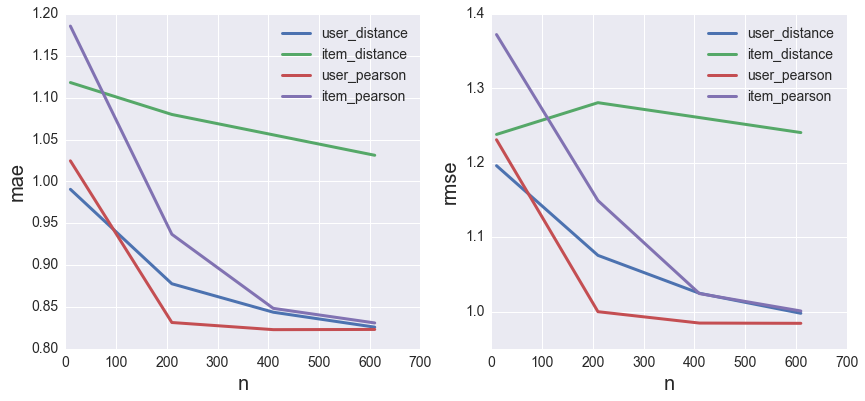

In [17]:
# plotting the results
sb.set()
pal = sb.color_palette("Set2", 2)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(rangeN, mae_user_distance, label='user_distance', linewidth=3)
plt.plot(rangeN, mae_item_distance, label='item_distance', linewidth=3)
plt.plot(rangeN, mae_user_pearson, label='user_pearson', linewidth=3)
plt.plot(rangeN, mae_item_pearson, label='item_pearson', linewidth=3)
plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('mae', fontsize=20)
plt.xlabel('n', fontsize=20)
plt.subplot(1,2,2)
plt.plot(rangeN, rmse_user_distance, label='user_distance', linewidth=3)
plt.plot(rangeN, rmse_item_distance, label='item_distance', linewidth=3)
plt.plot(rangeN, rmse_user_pearson, label='user_pearson', linewidth=3)
plt.plot(rangeN, rmse_item_pearson, label='item_pearson', linewidth=3)
plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('rmse', fontsize=20)
plt.xlabel('n', fontsize=20)

As shown on the plots mae and rmse of all the methods are decreasing with increasing of the number of neighbors. The exception is only the item-based method with distance similarity. Also, it should be noticed that the user-based methods works better here than the item-based.

## Task 2

In this task I use SVD method which is suggested by Antoine Vastel (http://antoinevastel.github.io/machine%20learning/python/2016/02/14/svd-recommender-system.html). I have modify the code for easily computing mae and rmse for this task.

In [1]:
import sys
import csv
import numpy as np
import math as mt
from scipy.sparse import *
from scipy import *
from scipy.sparse import csr_matrix
from sparsesvd import sparsesvd
from scipy.sparse.linalg import *
import seaborn as sb
import matplotlib.pyplot as plt
% matplotlib inline

We read our dataset and store it in sparse matrix using csr format. To do so we use the scipy library. It enables us to store only the non zero elements.

In [8]:
# Read the dataset
def readUrm(i):
    urm = np.zeros(shape=(1000,1700), dtype=np.float32)
    with open('movielens/u'+str(i)+'.base') as trainFile:
        urmReader = csv.reader(trainFile, delimiter='\t')
        for row in urmReader:
            urm[int(row[0]), int(row[1])] = float(row[2])
    return csc_matrix(urm, dtype=np.float32)

First we are going to create a function readUsersTest in order to get the ids of the users for which we want to make a prediction.

In [3]:
# Retrieve the test users
def readUsersTest(i):
    uTest = dict()
    with open('movielens/u'+str(i)+'.test') as testFile:
        testReader = csv.reader(testFile, delimiter='\t')
        for row in testReader:
            uTest.setdefault(int(row[0]), {})
    return uTest

In [4]:
# Read full test data for futher comparing
def readTest(i):
    Test = dict()
    with open('movielens/u'+str(i)+'.test') as testFile:
        testReader = csv.reader(testFile, delimiter='\t')
        for row in testReader:
            Test.setdefault(int(row[0]), {})
            Test[int(row[0])][int(row[1])] = int(row[2])
    return Test

In order to compute the singular value decomposition of our user rating matrix we need to create a function with two parameters : the user rating matrix and the rank of our SVD.

In [5]:
# Compute the SVD of our user rating matrix
def computeSVD(urm, K):
    U, s, Vt = sparsesvd(urm, K)
    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])
    U = csr_matrix(np.transpose(U), dtype=np.float32)
    S = csr_matrix(S, dtype=np.float32)
    Vt = csr_matrix(Vt, dtype=np.float32)
    return U, S, Vt

The final step is to predict recommendations for our test users. To do so we will use the matrices computed in the previous step.

In [9]:
# Predict the movies scores for our test users
def computeEstimatedRatings(U, S, Vt, uTest):
    rightTerm = S*Vt 
    estimatedRatings = np.zeros(shape=(1000, 1700), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recom = (-estimatedRatings[userTest, :]).argsort()
        # assign scores
        scores = list()
        for i in range(0,340):
            scores.append(5)
        for i in range(340,680):
            scores.append(4)
        for i in range(680,1020):
            scores.append(3)
        for i in range(1020,1360):
            scores.append(2)
        for i in range(1360,1700):
            scores.append(1)
        count = 0
        for r in recom:
            uTest[userTest][r] = scores[count]
            count = count + 1
    return uTest

The implementation of the experiment for different K values (the number of requested factors (an integer)) is given below.

In [10]:
rangeK = range(1,1000,300)
mae_svd = []
rmse_svd = []
counter = 0 # progress bar counter
for K in rangeK: # for different K
    mae = [] # mae for diffeerent splits
    rmse = [] # rmse for different splits
    for i in range(1,6): # for every split
        # printing progress bar
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
        sys.stdout.flush()
        local_mae = [] # mae for every user
        local_rmse = [] # rmse for every user
        urm = readUrm(i)
        U, S, Vt = computeSVD(urm, K)
        uTest = readUsersTest(i)
        Test = readTest(i)
        uTest = computeEstimatedRatings(U, S, Vt, uTest)
        for user in Test:
            test_scores = Test[user]
            train_scores = uTest[user]
            common_movies = set(train_scores.keys()).intersection(set(test_scores.keys()))
            if len(common_movies)==0: # if there is no such movies then continue
                continue
            # arranging scores for common movies
            scores_train = [train_scores[movie] for movie in common_movies]
            scores_test = [test_scores[movie] for movie in common_movies]
            scores_train = np.array(scores_train)
            scores_test = np.array(scores_test)
            # computing local metrics
            local_mae.append(sum(abs(scores_train-scores_test))/len(common_movies))
            local_rmse.append(sqrt(sum((scores_train-scores_test)**2)/len(common_movies)))
        counter = counter + 1 # updating counter
        # computing metrics for the split
        mae.append(np.array(local_mae).mean())
        rmse.append(np.array(local_rmse).mean())
    # printing progress bar
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('='*counter, 5*counter))
    sys.stdout.flush()
    # averaging split's metrics
    mae_svd.append(np.array(mae).mean())
    rmse_svd.append(np.array(rmse).mean())

[====================] 100%

Plots with the results of the expirements are given below.

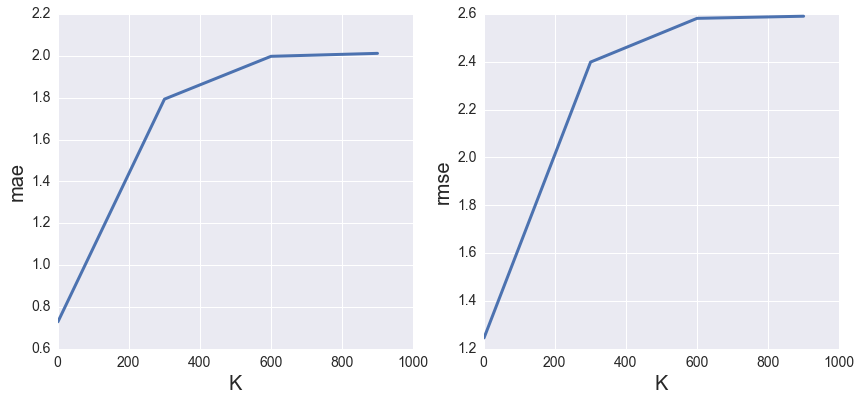

In [11]:
# plotting the results
sb.set()
pal = sb.color_palette("Set2", 2)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(rangeK, mae_svd, linewidth=3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('mae', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.subplot(1,2,2)
plt.plot(rangeK, rmse_svd, linewidth=3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('rmse', fontsize=20)
plt.xlabel('K', fontsize=20)

As it shown on the plots the mae and rmse are increasing with increasing of the value K. In general, this implementation of the SVD recommendation method here works worse than the collaborative filtering above.